In [1]:
# Importing Modules and Packages ===================================================================
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

# Loading Audio Files ===============================================================================
FIG_SIZE = (18,6)
file_name = 'sample_01.wav'
audio_data = '/Users/mji/Desktop/Coding_Study_2/sample/sample_06.wav'
sig, sr = librosa.load(audio_data, sr = 44100)


# Extracting Data ================================================================================
print(sig.shape)
print(sig)
print(sig[0])
  # signal이 672000(44100 * 길이)개의 벡터로 이루어져 있다.
  # sampling rate = 44100Hz / 1초에 44100개의 sample을 뽑았다는 의미.

/Users/mji/opt/anaconda2/lib/python2.7/site-packages/librosa/__init__.py:35: FutureWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  FutureWarning)


(769996,)
[ 0.          0.          0.         ... -0.01020813 -0.00991821
 -0.00979614]
0.0


In [2]:
# Playing Audio Files ==============================================================================

ipd.Audio(audio_data)

Text(0.5,1,'Waveform of sample_01.wav')

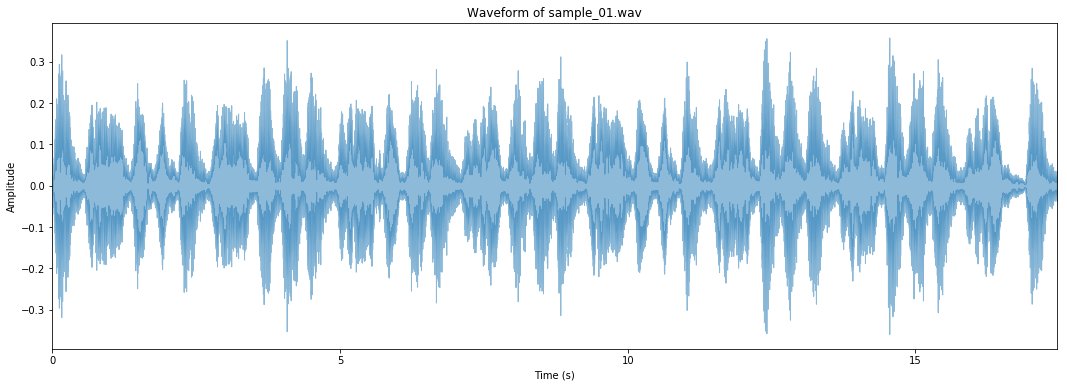

In [3]:
# Displaying Waveform_Time vs. Amplitude_Time Domain ===============================================

plt.figure(figsize = FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha = 0.5)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of "+ file_name)

In [4]:
# Estimate Tempo & Beats =========================================================================
onset_env = librosa.onset.onset_strength(sig, sr = sr, aggregate = np.median)
tempo = librosa.beat.tempo(onset_envelope = onset_env, sr = sr)
tempo, beats = librosa.beat.beat_track(onset_envelope = onset_env, sr = sr, units = 'time')

#tempo, beats = librosa.beat.beat_track(sig, sr = sr, units = 'time')
#librosa.output.times_csv('beat_times.csv', beats)


# Extracting Data ================================================================================
print(onset_env.shape)
print(tempo)
print(beats.shape)
print(beats)

(1504,)
147.65625
(40,)
[ 0.04643991  0.58049887  1.01006803  1.40480726  1.81115646  2.21750567
  2.7631746   3.18113379  3.58748299  4.00544218  4.42340136  4.94585034
  5.3754195   5.78176871  6.17650794  6.59446712  7.12852608  7.55809524
  7.95283447  8.37079365  8.77714286  9.31120181  9.729161   10.1355102
 10.54185941 10.94820862 11.49387755 11.92344671 12.31818594 12.72453515
 13.14249433 13.67655329 14.09451247 14.4892517  14.90721088 15.31356009
 15.73151927 16.14947846 16.54421769 16.93895692]


In [5]:
# Detecting Onsets ================================================================================
onset_frames = librosa.onset.onset_detect(sig, sr = sr)


# Extracting Data ================================================================================
print(onset_frames.shape)
print(onset_frames)
print(librosa.frames_to_time(onset_frames, sr=sr))

(53,)
[   3   49   64   75   87  120  155  190  237  252  263  307  343  379
  425  452  463  496  531  566  613  629  640  652  684  719  754  801
  816  827  871  907  942  963  989 1004 1015 1026 1059 1095 1130 1178
 1193 1204 1214 1247 1283 1318 1365 1381 1392 1404 1458]
[ 0.03482993  0.56888889  0.74303855  0.8707483   1.01006803  1.39319728
  1.79954649  2.20589569  2.75156463  2.92571429  3.05342404  3.56426304
  3.98222222  4.40018141  4.93424036  5.24770975  5.3754195   5.75854875
  6.16489796  6.57124717  7.1169161   7.30267574  7.43038549  7.56970522
  7.94122449  8.3475737   8.7539229   9.29959184  9.4737415   9.60145125
 10.11229025 10.53024943 10.93659864 11.18040816 11.48226757 11.65641723
 11.78412698 11.91183673 12.29496599 12.71292517 13.11927438 13.67655329
 13.85070295 13.9784127  14.09451247 14.47764172 14.89560091 15.30195011
 15.84761905 16.03337868 16.16108844 16.30040816 16.92734694]


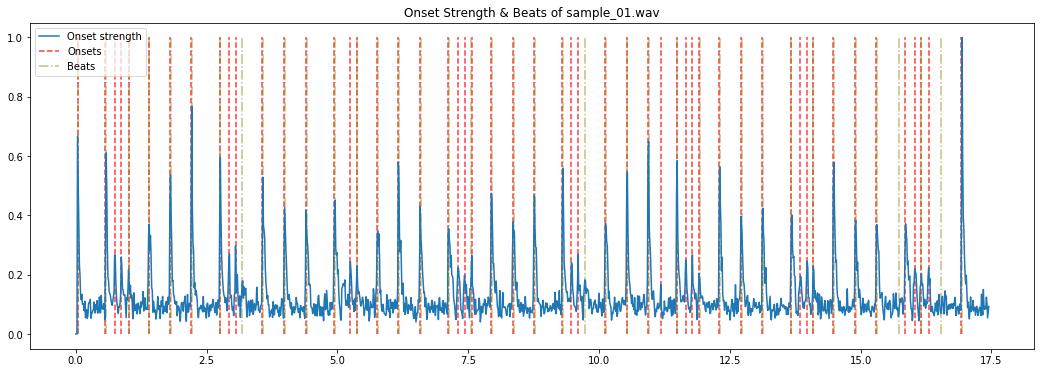

(53,)
[   3   49   64   75   87  120  155  190  237  252  263  307  343  379
  425  452  463  496  531  566  613  629  640  652  684  719  754  801
  816  827  871  907  942  963  989 1004 1015 1026 1059 1095 1130 1178
 1193 1204 1214 1247 1283 1318 1365 1381 1392 1404 1458]


In [6]:
# Displaying Onset Strength & Onsets & Beats ======================================================
o_env = librosa.onset.onset_strength(sig, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope = onset_env, sr = sr)  # no units = 'time'
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(sig))
plt.figure(figsize = FIG_SIZE)

plt.plot(times, o_env, label = 'Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color = 'red', alpha = 0.75, linestyle = '--', label = 'Onsets')
plt.vlines(times[beats], 0, 1, alpha = 0.5, color = 'olive', linestyle = '-.', label = 'Beats')
plt.axis('tight')
plt.legend(frameon = True, framealpha = 0.75)
plt.title("Onset Strength & Beats of "+ file_name)
plt.show()


# Extracting Data ================================================================================
print(onset_frames.shape)
print(onset_frames)

769996
769996
(384998, 384998)
(0.0, -11.661736)
(22049.97136345041, 68.338264)


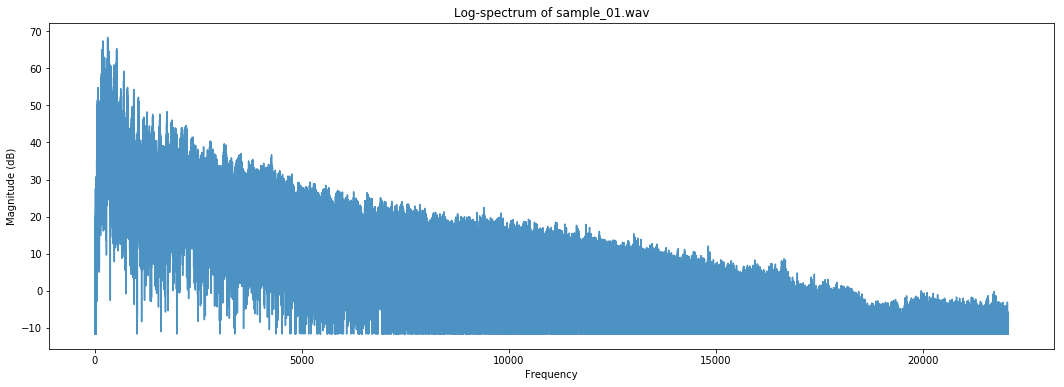

In [7]:
# Fast Fourier Transfrom(FFT) to Spectrum_Frequency vs. Magnitude_Frequency Domain ===============================
# FFT를 진행하면, 시간의 정보가 날아간다.

fft = np.fft.fft(sig, len(sig)/1)

# 복소공간 값 절댓값 취해서, magnitude(분리된 frequency가 전체 소리에 얼마나 영향을 주는지의 정도) 구하기
magnitude = np.abs(fft)

# magnitude의 제곱이 power / magnitude에 log scale을 하면 dB
#power = magnitude * magnitude
log_spectrum = librosa.amplitude_to_db(magnitude)

# Frequency 값 만들기
f = np.linspace(0, sr, len(log_spectrum))

# 푸리에 변환을 통과한 spectrumd은 대칭구조로 나와서 high frequency 부분 절반을 날리고 앞쪽 절반만 사용한다.
left_spectrum = log_spectrum[:int(len(log_spectrum)/2)]
left_f = f[:int(len(log_spectrum)/2)]

# Display Spectrum
plt.figure(figsize = FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha = 0.8)

plt.xlabel("Frequency")
plt.ylabel("Magnitude (dB)")
plt.title("Log-spectrum of "+ file_name)


# Extracting Data ================================================================================
print(len(sig))
print(len(fft))
print(len(left_f), len(left_spectrum))
print(min(left_f), min(left_spectrum))
print(max(left_f), max(left_spectrum))

(40, 1504)
[[37.667465 30.535845 26.302488 ... 33.805912 32.035408 29.595726]
 [29.219055 21.205128 16.127296 ... 20.272923 19.575357 20.152367]
 [25.940012 20.447205 15.429526 ... 21.362486 21.029472 21.532095]
 ...
 [56.92239  51.646275 49.454903 ... 66.65901  65.522545 58.18509 ]
 [61.711586 56.60558  52.373047 ... 70.4658   68.44495  58.605362]
 [60.970673 55.408398 51.031525 ... 73.64003  70.687775 59.436985]]


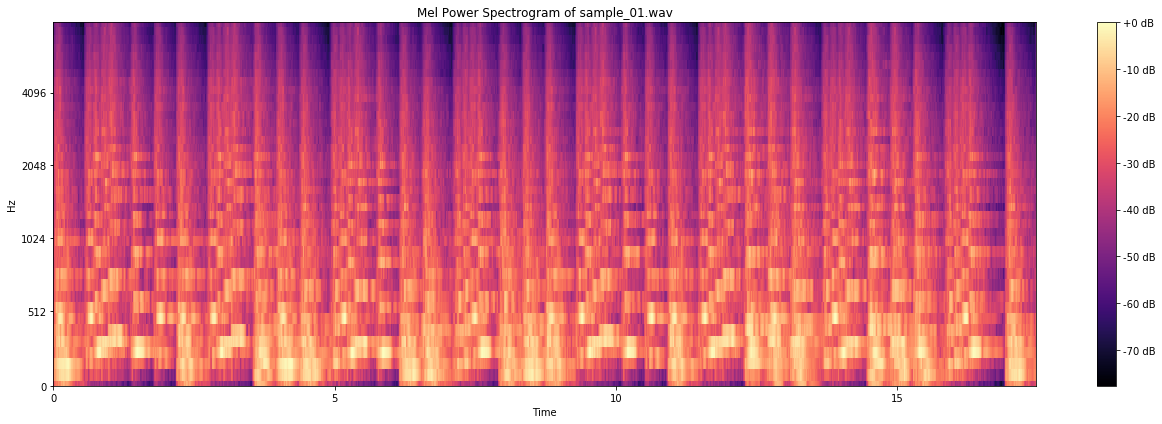

In [8]:
# Displaying Mel Power Spectrogram ===============================================================
S = librosa.feature.melspectrogram(sig, sr = sr, n_mels = 40, fmax = 8000)
log_S = librosa.power_to_db(S, ref = np.max)

plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(log_S, sr = sr, x_axis = 'time', y_axis = 'mel', fmax = 8000)

plt.title('Mel Power Spectrogram of ' + file_name)
plt.colorbar(format = "%+2.0f dB")
plt.tight_layout()


# Extracting Data ================================================================================
data = np.abs(log_S)
#np.set_printoptions(precision = 0)

print(data.shape)
print(data)
#print(data[0])
#print(data[1])
#print(data[39])
#print(data[0][0])